
# WeRateDogs Project

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gathering">Gather</a></li>
<li><a href="#Assessing">Assess</a></li>
<li><a href="#Cleaning">Clean</a></li>
<li><a href="#Analyze">Analyze</a></li>
</ul>

## Gather  
- Online data (Twitter and Udacity server)
- Locally stored files(csv file)
    

In [18]:
import pandas as pd
import json
import csv
import re
import tweepy
from tweepy import OAuthHandler
import time
from urllib import request
import matplotlib 

In [636]:
#download image prediction file in url programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
 
def download_txturl(txturl):
    response = request.urlopen(txturl)
    txt = response.read()
    txtstr = str(txt)
    lines = txtstr.split('\\n')
    dest = r'image_predictions.tsv'
    op = open(dest, 'w')
    for line in lines:
        op.write(line + '\n')
    op.close()

download_txturl(url)


In [637]:
consumer_key = 'jbL7N3K4eXgD1zhDfeS2TcnFr'
consumer_secret = 'XeIpJqZ4i8WAolHVCNBqGtILZKY1J0TVJw8GkpW9jDRthls1qn'
access_token = '495295426-3dc2rEDWSI8AX8NxYCpIRV9tk83EwocP7RzbraDC'
access_token_secret = 'zsulnNzoCcHRURBOkfVkb1tLcJPfYinSwfJBpn9Nam1FV'


# search_favorites(consumer_key, consumer_secret, access_token, access_token_secret):
#create authentication for accessing twitter
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#initialize Tweepy API
api = tweepy.API(auth, wait_on_rate_limit =True, wait_on_rate_limit_notify = True)
tweet_ids = df_archive.tweet_id


In [638]:
count = 0
fails_dict = {}
#save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    
    #loop through each tweet id filtered by the given archive file and write to outfile
    for tweet_id in tweet_ids:
        count += 1        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            
        except tweepy.TweepError as e:
            fails_dict[tweet_id] = e
            pass

Rate limit reached. Sleeping for: 591
Rate limit reached. Sleeping for: 600


In [19]:
df_new = pd.DataFrame(columns=['tweet_id', 'text','retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        text = status['full_text']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df_new = df_new.append(pd.DataFrame([[tweet_id, text, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'text', 'retweet_count', 'favorite_count']))
df_new = df_new.reset_index(drop=True)

In [20]:
df_archive = pd.read_csv('twitter-archive-enhanced-2.csv')
df_image = pd.read_csv('image-predictions-3.tsv',  delimiter='\t')

## Assess
- All tables were uploaded to google sheets and visually assessed. 
- Programmatic functions were also used to better understand the data. Problems with quality and tidiness that were identified through this assessment can be seen below. 

In [21]:
df_new.head()
df_new.shape

(2337, 4)

In [22]:
df_archive.head()
df_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [23]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [24]:
df_archive.isna().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [25]:
df_archive.tweet_id.duplicated().any()

False

In [26]:
df_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
the           8
Sadie         8
Daisy         7
Bailey        7
Buddy         7
Toby          7
an            7
Jax           6
Rusty         6
Stanley       6
Bella         6
Scout         6
Oscar         6
Jack          6
Koda          6
Leo           6
Milo          6
Dave          6
Alfie         5
           ... 
Traviss       1
Molly         1
Florence      1
Carbon        1
Willie        1
Karl          1
Lupe          1
Trigger       1
Kaiya         1
Pippin        1
O             1
Jeffri        1
Comet         1
Swagger       1
Sobe          1
Sky           1
Puff          1
Edd           1
Ferg          1
Bobby         1
Linus         1
my            1
Poppy         1
Tessa         1
Zooey         1
Maks          1
Jeremy        1
Herb          1
Sully         1
Clybe         1
Name: name, Length: 957,

In [27]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [28]:
df_archive.shape

(2356, 17)

In [29]:
df_image.head(10)
df_image.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
623,680583894916304897,https://pbs.twimg.com/media/CXHrcFYWcAEE5_L.jpg,1,tub,0.889801,False,bathtub,0.032351,False,hippopotamus,1.417730e-02,False
1242,747204161125646336,https://pbs.twimg.com/media/Cl6aOBhWEAALuti.jpg,2,coil,0.533699,False,dugong,0.087959,False,rain_barrel,3.922150e-02,False
1895,850019790995546112,https://pbs.twimg.com/media/C8vgfTsXgAA561h.jpg,3,Shetland_sheepdog,0.759907,True,collie,0.107405,True,Pembroke,5.233530e-02,True
512,676215927814406144,https://pbs.twimg.com/media/CWJmzNsWUAE706Z.jpg,1,hamster,0.999484,False,guinea_pig,0.000158,False,broccoli,6.091100e-05,False
1678,813202720496779264,https://pbs.twimg.com/media/C0kTjqIXgAAqpRi.jpg,1,cocker_spaniel,0.701852,True,golden_retriever,0.120345,True,Labrador_retriever,3.632020e-02,True
663,682662431982772225,https://pbs.twimg.com/media/CXlN1-EWMAQdwXK.jpg,1,beagle,0.413824,True,Cardigan,0.263553,True,basset,1.676180e-01,True
1291,751538714308972544,https://pbs.twimg.com/media/Cm4AeG8XEAAulD2.jpg,2,Labrador_retriever,0.516257,True,golden_retriever,0.210839,True,dingo,1.620220e-01,False
1549,792913359805018113,https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg,4,web_site,0.226716,False,lighter,0.081941,False,switch,3.900860e-02,False
1319,756275833623502848,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,1,Airedale,0.602957,True,Irish_terrier,0.086981,True,bloodhound,8.627650e-02,True
1693,816014286006976512,https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg,1,English_setter,0.677408,True,Border_collie,0.052724,True,cocker_spaniel,4.857190e-02,True


In [30]:
df_image.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
beagle                        18
Maltese_dog                   18
Eskimo_dog                    18
teddy                         18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

#### Quality
##### archive table
- Missing data for retweets and likes
- Incorrect ratings data and unnusable values
    - abnormal values
    - 75 should be 9.75
    - 1776, 420, other outliers will skew analysis
- Erroneous data types (ID, ratings, favorite_count, retweet_count, timestamp) 
- Retweets and reply-to tweets need to be removed
- Retweets and reply-to columns need to be removed
- Rows without images need to be removed
- Erroneous and missing names
- Source column is hard to understand



##### image prediction table
- results that are not dogs should be removed
- Erroneous datatypes (tweet_id)

#### Tidiness
##### archive table
- There should be one column for dog stages
- There should be one column for dog breed, and it should be connected to the archive table
- There should be one columns for rating 
- rows with more than one rating should be removed (multiple observations within one row)



## Clean

### Missing data:
####  Define: 
 - The likes and retweet counts will be added. 
 - The archive and new dataframes are combined with an inner join. This will exclude values from the archive that are no longer present. This will be easier if the tweet IDs are strings. 
 - Data types are changed so that the archive table and newly extracted data can be combined. 
 - Tables are merged with an inner join to revove any tweets not existing in both dataframes.


In [31]:
#make copies of dataframes
df_new2 = df_new.copy()
df_archive2 = df_archive.copy()
df_image2 = df_image.copy()

#### Code

In [32]:
df_new2.tweet_id = df_new2['tweet_id'].astype('str')
df_archive2.tweet_id = df_archive2.tweet_id.astype('str')

In [33]:
df_clean = df_archive2.merge(df_new2, how= 'inner', on = 'tweet_id')

#### Test

In [34]:
df_clean.head(3)
df_clean2.tweet_id.duplicated().any()

NameError: name 'df_clean2' is not defined

### Unnecessary columns/data
 #### Define: 
 - Unnecessary tweets are removed by removing rows that contain a value in retweet-status and in-reply-to columns as well as those that do not contain photos. Excess columns are removed. 
 - Rows with other than null values in retweeted and in_reply_to columns are dropped from the dataset
 - the old text will be replaced by my newly collected text as it will be used later and I want to be sure of its correctness
 - tweets without a photo are also dropped
 - Unnecessary columns are removed.





#### Code

In [35]:
df_clean = df_clean[(df_clean['retweeted_status_id'].isna()) & (df_clean['in_reply_to_status_id'].isna())]

#### Test

In [36]:
# Test: the new and old text columns were compared to identify any differences
df_clean[df_clean.text_y != df_clean.text_x]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text_x,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,text_y,retweet_count,favorite_count


#### Code

In [37]:
df_clean.drop('text_x', axis = 1, inplace = True)

In [38]:
#the name is changed back to 'text'
df_clean.rename(columns = {'text_y': 'text'}, inplace = True)

In [39]:
df_clean = df_clean[df_clean.text.str.contains("https://")]

In [40]:
df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'rating_denominator', 'in_reply_to_status_id', 'in_reply_to_user_id'],  axis =1, inplace = True )

#### Test

In [41]:
df_clean.head()
df_clean.info()
# check for any remaing text columns containing "RT". The resulting rows are not retweets.
df_clean[df_clean.text.str.contains('RT ')]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2336
Data columns (total 13 columns):
tweet_id            2090 non-null object
timestamp           2090 non-null object
source              2090 non-null object
expanded_urls       2090 non-null object
rating_numerator    2090 non-null int64
name                2090 non-null object
doggo               2090 non-null object
floofer             2090 non-null object
pupper              2090 non-null object
puppo               2090 non-null object
text                2090 non-null object
retweet_count       2090 non-null object
favorite_count      2090 non-null object
dtypes: int64(1), object(12)
memory usage: 228.6+ KB


,tweet_id,timestamp,source,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,text,retweet_count,favorite_count
1268,708400866336894977,2016-03-11 21:15:02 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",https://vine.co/v/iHFqnjKVbIQ,12,None,None,None,None,None,RT if you are as ready for summer as this pup ...,10614,16515
1632,683515932363329536,2016-01-03 05:11:12 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",https://vine.co/v/ibvnzrauFuV,11,None,None,None,None,None,HEY PUP WHAT'S THE PART OF THE HUMAN BODY THAT...,3074,7612
1841,675489971617296384,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/675489971...,10,None,None,None,None,None,RT until we find this dog. Clearly a cool dog ...,619,1321
1972,672622327801233409,2015-12-04 03:43:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/672622327...,12,None,None,None,pupper,None,This lil pupper is sad because we haven't foun...,499,1305


In [42]:
df_clean.shape

(2090, 13)

### Stage should be one column
#### Define:

  - re-extract from text, join, and then delete excess columns
  - stages are extracted again from the text column
  - the new stage column is a list. The few columns with double entries are separated with a comma and all values become strings. 
  -  A forward slash replaces the comma for visual purposes
  - Excess columns are removed and results are stored in a new dataframe. 




#### Code

In [43]:
df_clean['stage'] = df_clean.text.str.findall(r'(doggo|floofer|pupper|puppo)')

In [44]:
df_clean['stage'] = df_clean['stage'].str.join(',')

In [45]:
df_clean.stage = df_clean.stage.str.replace(',', '/')

In [46]:
#replecated stages are removed
df_clean['stage'].replace('pupper/pupper', 'pupper', inplace =True) 
df_clean['stage'].replace('pupper/doggo/doggo', 'pupper/doggo', inplace = True) 
df_clean['stage'].replace('pupper/pupper/pupper', 'pupper', inplace = True) 

In [47]:
df_clean2 = df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1)

#### Test

In [48]:
df_clean2.stage.value_counts()

                1738
pupper           237
doggo             75
puppo             27
doggo/pupper       5
floofer            4
pupper/doggo       2
puppo/doggo        2
Name: stage, dtype: int64

### Correction of ratings
#### Define:
  - Re-extract ratings and remove outliers. 
  - A regular expression is used to find all ratings
  - Rows with multiple ratings or no ratings are removed
  - The value is selected from the list so that it is no more in list format
  - The numerator is selected
  - The original rating numerator column is removed
   - Outliers are removed






#### Code

In [54]:
rating = df_clean2.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
df_clean2['rating_numerator'] = rating['rating_numerator'].astype(float)
df_clean2['rating_denominator'] = rating['rating_denominator'].astype(float)

12       484
10       433
11       413
13       285
9        153
8         98
7         52
14        38
5         33
6         32
3         19
4         16
2          9
1          5
9.75       1
1776       1
13.5       1
60         1
11.26      1
50         1
144        1
0          1
84         1
420        1
11.27      1
204        1
99         1
24         1
165        1
88         1
44         1
80         1
45         1
121        1
Name: rating_numerator, dtype: int64

#### Test

In [740]:
df_clean2.head()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,name,text,retweet_count,favorite_count,stage,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,Phineas,This is Phineas. He's a mystical boy. Only eve...,8188,37545,,13/10
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,Tilly,This is Tilly. She's just checking pup on you....,6058,32274,,13/10
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,Archie,This is Archie. He is a rare Norwegian Pouncin...,4008,24314,,12/10
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,Darla,This is Darla. She commenced a snooze mid meal...,8343,40885,,13/10
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,Franklin,This is Franklin. He would like you to stop ca...,9037,39086,,12/10


#### Code

In [741]:
df_clean2.rating = df_clean2['rating'].str.extract('(^\d+)')

In [742]:
df_clean2.rating = df_clean2.rating.astype(float)

#### Test

In [743]:
# New rating column is compared to the old rating column for exploration of differences. 
df_clean2.query('rating != rating_numerator')

,tweet_id,timestamp,source,expanded_urls,rating_numerator,name,text,retweet_count,favorite_count,stage,rating
1050,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/740373189...,9,None,"After so many requests, this is Bretagne. She ...",13976,36027,,14.0
1147,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/722974582...,4,None,Happy 4/20 from the squad! 13/10 for all https...,1639,4220,,13.0
1184,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/716439118...,50,Bluebert,This is Bluebert. He just saw that both #Final...,219,2438,,11.0
1644,682962037429899265,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/682962037...,7,Darrel,This is Darrel. He just robbed a 7/11 and is i...,17564,38218,,10.0
2316,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666287406...,1,an,This is an Albanian 3 1/2 legged Episcopalian...,63,141,,9.0


#### Code

In [744]:
df_clean2.drop('rating_numerator', axis =1, inplace =True)

In [745]:
df_clean2 = df_clean2.query('rating <20')

#### Test

In [746]:
df_clean2.rating.value_counts()
df_clean.shape

(2090, 14)

### Breeds should be one column
#### Define:
 - The image prediction data set is cleaned so that there is one value per tweet, then added to the main table.
 - new data frames are created that will designate the most likely dog breed for each tweet. Predictions where no result was a dog breed are removed.
 - The new dataframes are concatenated into one
 - All columns except the new breed column and the twitter ID are removed. 
 - The tweet_id data types are changed to strings so the tables can be merged
 - The dataframes are merged so that there is now a breed column in the main dataframe. Tweets with no reasonable prediction will now have null values.


#### Code

In [747]:
 
df_1 = df_image2.query('p1_dog == True')
df_2 = df_image2.query('p1_dog != True & p2_dog == True')
df_3 = df_image2.query('p1_dog != True & p2_dog != True & p3_dog == True')

df_1['breed'] = df_1['p1']
df_2['breed'] = df_2['p2']
df_3['breed'] = df_3['p3']

C:\Users\Summer\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Summer\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Summer\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

In [748]:
len(df_1) + len(df_2) + len(df_3)
len(df_image)

2075

In [749]:
image_clean = pd.concat([df_1, df_2, df_3], axis=0, join='outer', join_axes=None, ignore_index=True,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
image_clean = image_clean[['tweet_id','breed']]

In [750]:
image_clean = image_clean.astype(str, copy=True)
df_clean2 = df_clean2.merge(image_clean, how = 'left', on = 'tweet_id')

#### Test

In [751]:
df_clean2.info()
df_clean2.tweet_id.duplicated().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 11 columns):
tweet_id          2051 non-null object
timestamp         2051 non-null object
source            2051 non-null object
expanded_urls     2051 non-null object
name              2051 non-null object
text              2051 non-null object
retweet_count     2051 non-null object
favorite_count    2051 non-null object
stage             2051 non-null object
rating            2051 non-null float64
breed             1627 non-null object
dtypes: float64(1), object(10)
memory usage: 192.3+ KB


False

### Missing names and name corrections
 - Some of the names were recovered from the text by searching with an additional regular expression. Then erroneous names were corrected one at a time. Then common name errors such as "a" were replaced with "None".
 - Visual analysis showed that 23 missing names are preceded with "named". Additional names are extracted from the text into a new column
 - The old name values are added to the new names columns
 - Many of the erroneous names have been removed by the other filtering processes above. The ones remaining are "quite" and "a". The dog with the name "a" has an instgram name of "Puffie the Chow". 



#### Code

In [752]:
df_clean2['names'] = df_clean2['text'].str.extract(r'named (\w+)')

In [753]:
df_clean2['names'].fillna(df_clean2['name'], inplace =True)

In [754]:
df_clean2.loc[df_clean2['tweet_id'] == '881536004380872706', 'names'] = "puffie_the_chow"
df_clean2.loc[df_clean2['tweet_id'] == '765395769549590528', 'names'] = "Zoey"
df_clean2.loc[df_clean2['tweet_id'] == '828650029636317184', 'names'] = "Grace"
df_clean2.loc[df_clean2['name'] == 'a', 'names'] = "None"
df_clean2.loc[df_clean2['name'] == 'an', 'names'] = "None"
df_clean2.loc[df_clean2['name'] == 'quite', 'names'] = "None"
df_clean2.loc[df_clean2['name'] == 'such', 'names'] = "None"
df_clean2.loc[df_clean2['name'] == 'just', 'names'] = "None"
df_clean2.loc[df_clean2['name'] == 'unacceptable', 'names'] = "None"
df_clean2.loc[df_clean2['name'] == 'the', 'names'] = "None"

In [755]:
df_clean2.drop('name', axis = 1, inplace = True)

#### Test

In [756]:

df_clean2.names.value_counts()

None        653
Lucy         11
Cooper       10
Oliver       10
Charlie      10
Tucker        9
Penny         9
Lola          8
Sadie         8
Winston       8
Toby          7
Daisy         7
Jax           6
Koda          6
Bella         6
Bo            6
Stanley       6
Oscar         6
Bailey        6
Milo          5
Leo           5
Chester       5
Dave          5
Scout         5
Bentley       5
Louis         5
Buddy         5
Rusty         5
Derek         4
Jeffrey       4
           ... 
Derby         1
Tedrick       1
Ralph         1
Eevee         1
Hero          1
Spencer       1
light         1
Suki          1
Timison       1
Rueben        1
Lipton        1
Dietrich      1
Clarkus       1
Ginger        1
Brockly       1
Tilly         1
Kollin        1
Stephan       1
Obi           1
Jeffrie       1
Tino          1
Randall       1
Gin           1
Herb          1
Ike           1
Chompsky      1
Champ         1
Mac           1
Jordy         1
Link          1
Name: names, Length: 936

### Miscelaneous cleaning 
 - 'source' value simplification, datatype corrections, addition of days of the week column
 - Source columns are simplified
 - The remaining incorrect datatypes are changed to allow for analysis
 - Another column is produced with the day of the week for purposes of analysis

#### Code

In [757]:
df_clean2.loc[df_clean2['source'] == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'source'] = 'iPhone'
df_clean2.loc[df_clean2['source'] == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'source'] = 'twitter_web_client'
df_clean2.loc[df_clean2['source'] == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'source'] = 'vine_make_a_scene'
df_clean2.loc[df_clean2['source'] == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'source'] = 'tweet_deck'

In [758]:
df_clean2.retweet_count = df_clean2.retweet_count.astype(int)
df_clean2.favorite_count = df_clean2.favorite_count.astype(int)
df_clean2.stage = df_clean2.stage.astype('category')
df_clean2.timestamp = pd.to_datetime(df_clean2['timestamp'])
df_clean2.source = df_clean2.source.astype('category')          

In [759]:
import datetime as dt
df_clean2['day_of_week'] = df_clean2['timestamp'].dt.dayofweek
df_clean2.day_of_week = df_clean2.day_of_week.astype('int')
df_clean2.day_of_week.value_counts()

0    342
1    307
2    304
3    287
4    284
5    267
6    260
Name: day_of_week, dtype: int64

#### Test

In [760]:
df_clean2.shape

(2051, 12)

In [761]:
#csv file created
df_clean2.to_csv('twitter_archive_master.csv')

# Analyse

In [694]:
import seaborn
import statsmodels.api as sm
import matplotlib.pyplot as plt
df_clean2.describe()

,retweet_count,favorite_count,rating,day_of_week
count,2051.000000,2051.000000,2051.000000,2051.000000
mean,2703.535349,8767.448562,10.621160,2.831302
std,4718.260584,12667.015207,2.150739,2.005314
min,11.000000,76.000000,0.000000,0.000000
25%,596.500000,1941.000000,10.000000,1.000000
50%,1307.000000,3994.000000,11.000000,3.000000
75%,3073.500000,10916.500000,12.000000,5.000000
max,82462.000000,162144.000000,14.000000,6.000000


In [695]:
df_clean3 = df_clean2.copy()
df_clean3['intercept'] = 1

lm = sm.OLS(df_clean3['rating'], df_clean3[['intercept', 'retweet_count']])
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     199.9
Date:                Mon, 13 May 2019   Prob (F-statistic):           2.29e-43
Time:                        14:17:17   Log-Likelihood:                -4385.0
No. Observations:                2051   AIC:                             8774.
Df Residuals:                    2049   BIC:                             8785.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        10.2538      0.052    196.203      0.000      10.151      10.356
retweet_count     0.0001   9.61e-06     14.137      0.000       0.000       0.000
==============================================================================
Omnibus:                      666.320   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2086.922
Skew:                          -1.648   Prob(JB):                         0.00
Kurtosis:                       6.682   Cond. No.                     6.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Retweet and Favorite Count')

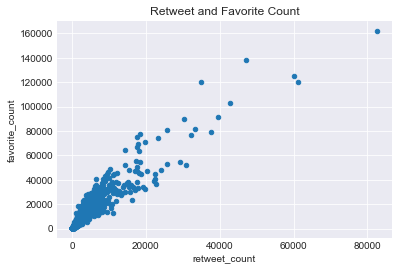

In [696]:
plt.style.use('seaborn-darkgrid')
df_clean2.plot(x = 'retweet_count', y = 'favorite_count', kind = 'scatter')
plt.title('Retweet and Favorite Count')

In [697]:
lm = sm.OLS(df_clean3['favorite_count'], df_clean3[['intercept', 'retweet_count']])
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 1.252e+04
Date:                Mon, 13 May 2019   Prob (F-statistic):               0.00
Time:                        14:17:18   Log-Likelihood:                -20274.
No. Observations:                2051   AIC:                         4.055e+04
Df Residuals:                    2049   BIC:                         4.056e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      2039.1829    120.944     16.861      0.000    1801.997    2276.369
retweet_count     2.4887      0.022    111.877      0.000       2.445       2.532
==============================================================================
Omnibus:                      557.737   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12496.834
Skew:                           0.736   Prob(JB):                         0.00
Kurtosis:                      15.003   Cond. No.                     6.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Rating and Favorite Count')

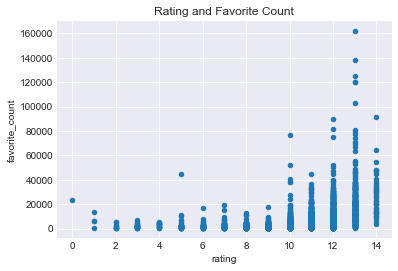

In [698]:
df_clean2.plot(x = 'rating', y = 'favorite_count', kind = 'scatter')
plt.title('Rating and Favorite Count')

Text(0.5, 1.0, 'Ratings Over Time')

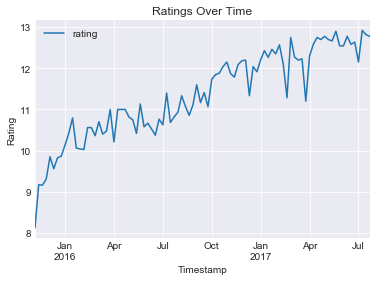

In [699]:
dftime = df_clean2
dftime.timestamp = dftime.timestamp.values.astype('<M8[W]')

dftime2 = dftime.groupby('timestamp').mean()[['rating']]
dftime2.plot()
plt.xlabel('Timestamp')
plt.ylabel('Rating')
plt.title('Ratings Over Time')

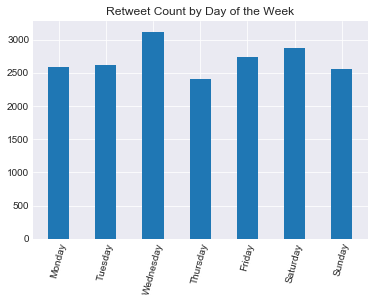

In [700]:
df5 = df_clean2.groupby('day_of_week').mean()[['retweet_count']]
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
p1 = plt.bar(df5.index, df5.retweet_count, width)
#plt.xticks(days)
plt.xticks(np.arange(7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'), rotation = 75)
plt.title('Retweet Count by Day of the Week')
plt.show()



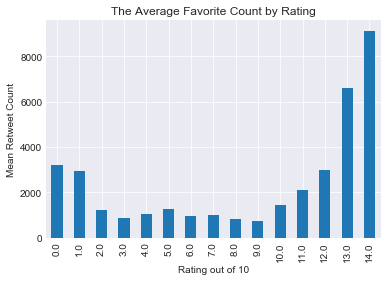

In [701]:
df2 = df_clean2.groupby('rating').mean()[['retweet_count']]
df2.plot(kind = 'bar')
plt.ylabel('Mean Retweet Count')
plt.xlabel('Rating out of 10')
plt.title('The Average Favorite Count by Rating')
plt.legend().set_visible(False)

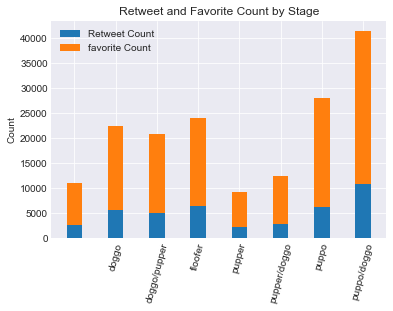

,retweet_count,favorite_count
stage,,
,2549.467213,8393.221311
doggo,5660.040541,16742.891892
doggo/pupper,5100.200000,15688.600000
floofer,6436.500000,17646.250000
pupper,2296.393013,6944.235808
pupper/doggo,2814.500000,9527.000000
puppo,6197.074074,21774.037037


In [702]:
import numpy as np
df4 = df_clean2.groupby('stage').mean()[['retweet_count', 'favorite_count']]


width = 0.38       
p1 = plt.bar(df4.index, df4.retweet_count, width)
p2 = plt.bar(df4.index, df4.favorite_count, width, bottom= df4.retweet_count)

plt.ylabel('Count')
plt.title('Retweet and Favorite Count by Stage')
plt.xticks(df4.index, rotation=75)
plt.legend((p1[0], p2[0]), ('Retweet Count', 'favorite Count'))

plt.show()

df4.head(7)

In [703]:
breed = df_clean2.groupby( 'breed').count().nlargest(10, 'tweet_id')
breed.reset_index(inplace = True)
df_breed= df_clean2[df_clean2['breed'].isin(breed['breed'])]

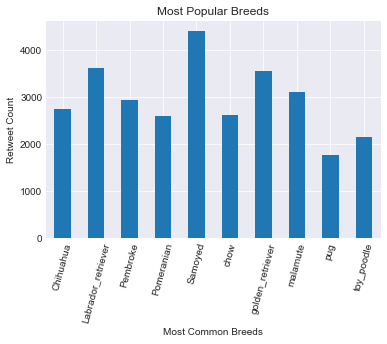

In [704]:
df_breed1 = df_breed.groupby('breed').mean()[['retweet_count']]
df_breed1.plot(kind = 'bar')
plt.xlabel('Most Common Breeds')
plt.ylabel('Retweet Count')
plt.title('Most Popular Breeds')
plt.xticks( rotation=75)
plt.legend().set_visible(False)

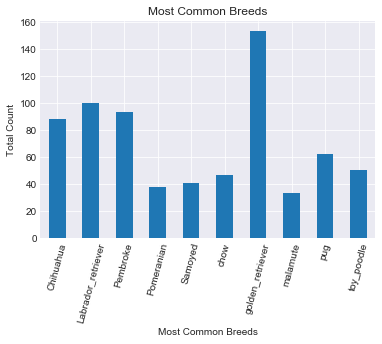

In [705]:
df_breed2 = df_breed.set_index('breed')
df_breed3 = df_breed.groupby('breed').count()[['tweet_id']]
df_breed3.plot(kind = 'bar')
plt.xticks(rotation = 75)
plt.xlabel('Most Common Breeds')
plt.ylabel('Total Count')
plt.title('Most Common Breeds')
plt.legend().set_visible(False)

In [706]:
df_clean2[df_clean2.favorite_count== df_clean2.favorite_count.max()]

,tweet_id,timestamp,source,expanded_urls,text,retweet_count,favorite_count,stage,rating,breed,names,day_of_week
812,744234799360020481,2016-06-16,iPhone,https://twitter.com/dog_rates/status/744234799...,Here's a doggo realizing you can stand in a po...,82462,162144,doggo,13.0,Labrador_retriever,None,5


In [707]:
df_clean2.shape

(2051, 12)

In [708]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Data columns (total 12 columns):
tweet_id          2051 non-null object
timestamp         2051 non-null datetime64[ns]
source            2051 non-null category
expanded_urls     2051 non-null object
text              2051 non-null object
retweet_count     2051 non-null int32
favorite_count    2051 non-null int32
stage             2051 non-null category
rating            2051 non-null float64
breed             1627 non-null object
names             2051 non-null object
day_of_week       2051 non-null int32
dtypes: category(2), datetime64[ns](1), float64(1), int32(3), object(5)
memory usage: 156.8+ KB
